# Problem Set 4, Part Two: Due Tuesday, February 18 by 8am Eastern Standard Time

## Name:

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Power Curve of Wilcoxon Signed Rank Test

**(a)** Threshold for Signed Rank Test

Consider paired random samples of size $n=100$, whose differences are $\{{\color{royalblue}{D_i}}\}$.  Suppose we want to use a one-sided Wilcoxon signed-rank test to evaluate the null hypothesis that the differences are drawn from a distribution with zero median against the alternative that that median is positive.  If we wish to construct a test of significance $\alpha=0.0443$, what is the rejection region, expressed in terms of a threshold on the sum of the positive ranks?  Use whatever software or approximation you like, but show and explain your work.

If you reject the null hypothesis when ${\color{royalblue}{T^{+}}}> c$, store that $c$ in the variable `tpthresh`.

In [3]:
from wilcoxondists import signrankpmf, signrankcdf, signrankppf

In [4]:
def alpha_search(alpha, n, tol=1e-6):
    left, right = 0, n * (n + 1) // 2  # wilcoxon range
    while left < right:
        mid = (left + right) // 2
        cdf_value = signrankcdf(mid, n)
        if abs(cdf_value - alpha) < tol:  # converged to desired alpha
            return mid
        elif cdf_value < alpha:
            left = mid + 1
        else:
            right = mid
    return left  # best estimate of tp

In [5]:
a = 0.0443
n = 100

# here I do a binary search to find the closest threshold to the confidence level
tpthresh = alpha_search(1-a, n)

print(tpthresh)

3020


**(b)** Normal Sampling Distribution

We generate $N=10^4$ standard normal samples of size $n=100$ as in the previous problem set.  These will represent the differences $\{d^{(I)}_i=y^{(I)}_i-x^{(I)}_i\}$ where $I=1,\ldots,N$ labels the Monte Carlo iteration and $i=1,\ldots,n$ labels the variables in the sample.

In [6]:
N = 10**4
n = 100
np.random.seed(20250218)
d_Ii = stats.norm.rvs(size=(N,n))

Now we generate a vector of $n_{\theta}=51$ values of $\theta$ between $0$ and $0.6$.  If $\{d^{(I)}_i\}$ is a set of standard normal samples, $\{d^{(I)}_i + \theta\}$ is a set of samples from $N(\theta,1)$.

In [7]:
nthetas = 51
theta_t = np.linspace(0,0.6,nthetas)

Now we calculate the signed rank statistic $T^{+}{}^{(I)}_\theta$ from the $I$th sample drawn from the distribution with location parameter $\theta$, and call it `T_tI` where $t$ is |the index labelling the different $\theta$ values and $I$ is the sample number.

We run into an issue with the rank transformation.  The standard `rankdata` function in `scipy.stats` will just rank all of the $10^4\times 100=10^6$ elements in the array `d_Ii`:

In [8]:
stats.rankdata(np.abs(d_Ii))

array([976654., 322922.,  85189., ..., 640420.,  57554., 394470.])

But we don't want a single list of a million ranks.  We want ten thousand lists of a hundred ranks each.  I.e., we want, for each $I$, to rank all of the $\left\{\left.\lvert d^{(I)}_i\rvert\right|i=1,\ldots,n\right\}$.  This means we want to rank over the last axis of the NumPy array.

In [9]:
R_Ii = stats.rankdata(np.abs(d_Ii),axis=-1)

Note that in older versions (<1.5) of SciPy, `stats.rankdata()` lacked this functionality, and one had to use `stats.mstats.rankdata()` to rank over one axis of an array.

In [10]:
import scipy
scipy.version.full_version

'1.13.1'

We can see, for instance, the set of ranks corresponding to the differences in the first Monte Carlo iteration:

In [11]:
d_Ii[0]

array([ 2.26750458,  0.41705151, -0.10645224, -0.65497211,  0.59623678,
       -1.0961618 ,  0.40096369, -1.28036774, -1.31906758, -1.32152961,
       -1.25112031, -0.33545551,  0.06117597, -0.02443652, -0.38588631,
       -0.30690351, -0.25203266,  0.02990092,  0.20478179, -1.09222994,
        1.07619699, -0.83162857, -1.04633772,  1.60659846,  0.01738925,
       -0.40568589,  0.3065391 , -0.0904972 , -1.20704912, -0.07159959,
       -0.08012918,  2.05091542,  0.34667788, -0.21683142,  0.02557749,
        0.91606526,  0.50600871, -0.39476321,  1.66785064, -0.29928159,
       -0.30667652, -0.42905318, -0.83027961,  1.49745908,  0.73660077,
       -1.45025661,  0.55356325,  1.35972134,  1.44772219, -0.03300201,
        0.37346564, -0.41805027,  0.35696152,  0.72970944,  1.13240318,
       -2.22497188,  0.21810984,  1.39395328,  0.73571356,  0.63073245,
       -0.40299981, -0.84762025, -0.61254976, -0.20102752,  0.08963105,
        0.39411388,  0.92915591,  0.35762146,  0.43585848,  0.77

In [12]:
R_Ii[0]

array([ 99.,  40.,  14.,  55.,  50.,  76.,  37.,  82.,  84.,  85.,  81.,
        28.,   8.,   4.,  34.,  27.,  22.,   6.,  17.,  75.,  74.,  65.,
        73.,  92.,   2.,  39.,  25.,  13.,  80.,  10.,  11.,  97.,  30.,
        18.,   5.,  68.,  45.,  36.,  93.,  24.,  26.,  42.,  64.,  90.,
        61.,  89.,  48.,  86.,  88.,   7.,  33.,  41.,  31.,  59.,  78.,
        98.,  19.,  87.,  60.,  54.,  38.,  66.,  52.,  16.,  12.,  35.,
        69.,  32.,  43.,  62.,  91.,  20.,  58.,  53.,  94.,  63.,  23.,
        57.,  51.,  71.,   1.,  46.,  79.,  29.,  47.,  70.,   9.,  21.,
        77.,  67.,  96.,  15.,  83.,   3.,  56., 100.,  44.,  95.,  49.,
        72.])

Now we need to calculate the signed rank statistic for each $\theta$ value, for each Monte Carlo iteration $I$.  Unfortunately, we do need to re-calculate all the ranks for every $\theta$ value, since, for a given $I$, the rankings of the $\{|d^{(I)}_i+\theta|\}$ for all the $i$ are not the same as the rankings of the $\{|d^{(I)}_i|\}$.  (I.e., adding $\theta$ doesn't change the value of the differences, but it does change the order of their absolute values.)

**<font color="red">NOTE:</font> The next cell will take a few minutes to execute**

In [13]:
# # This would be the vectorized way to do this, but because it's ranking a 51x10000x100 element array
# # along the last axis, it uses up too much memory and slows things down
# d_tIi = d_Ii[None,:,:]+theta_t[:,None,None]
# Tp_tI = stats.rankdata(np.abs(d_tIi),axis=-1)[d_tIi>0].sum(axis=-1)

# So instead we resort to looping over the theta values:
Tp_tI = np.empty((nthetas,N))
for t in range(nthetas):
    dt_Ii = d_Ii + theta_t[t]
    Rt_Ii = stats.rankdata(np.abs(dt_Ii),axis=-1)
    # Note that we have to use the construction Rt_Ii*(dt_Ii>0) (multiplying by the boolean array)
    # instead of Rt_Ii[dt_Ii>0] (indexing by the boolean array) since there will be a different number
    # of positive ranks for each value of I.  So we need to set the negative ranks to zero rather than
    # just dropping them.
    Tp_tI[t] = (Rt_Ii*(dt_Ii>0)).sum(axis=-1)

In [14]:
Tp_tI

array([[2701., 2639., 2578., ..., 2113., 2487., 2586.],
       [2747., 2687., 2613., ..., 2139., 2514., 2611.],
       [2776., 2738., 2653., ..., 2179., 2543., 2634.],
       ...,
       [4215., 4282., 4267., ..., 3732., 4019., 4050.],
       [4230., 4311., 4297., ..., 3771., 4050., 4074.],
       [4254., 4343., 4317., ..., 3790., 4079., 4092.]])

Now we can construct the power $\gamma(\theta)$ of a test which rejects the null hypothesis when the sum of the positive ranks exceeds the threshold `tpthresh` from part (a).

In [15]:
gammasr_t = np.mean(Tp_tI>tpthresh,axis=-1)

Repeat the computations from problem set 3, obtaining power curves `gammas_t` and `gammat_t` for the sign and paired $t$ tests on the same data, and plot these three curves on the same set of axes, $\gamma(\theta)$ versus $\theta$.  How do the tests perform relative to each other when the sample is drawn from a normal distribution?

In [16]:
# get signed
p = 0.5

mu = n * p
sigma = np.sqrt(n * p * (1-p))
ncrit = stats.norm(mu, sigma).isf(0.05)

ptheta_t = stats.norm(loc=theta_t).sf(0)

gammas_t = stats.binom(n,ptheta_t).sf(ncrit)

In [17]:
# t-test
tcrit = stats.t.isf(a, n-1)

np.random.seed(20250211)
N = 10**4
x_Ii = stats.norm.rvs(size=(N,n))
xbar_I = np.mean(x_Ii,axis=-1)
s_I = np.std(x_Ii,axis=-1,ddof=1)
t_tI = ( theta_t[:,None] + xbar_I[None,:] ) / (s_I[None,:]/np.sqrt(n))
gammat_t = np.mean((t_tI > tcrit),axis=-1)

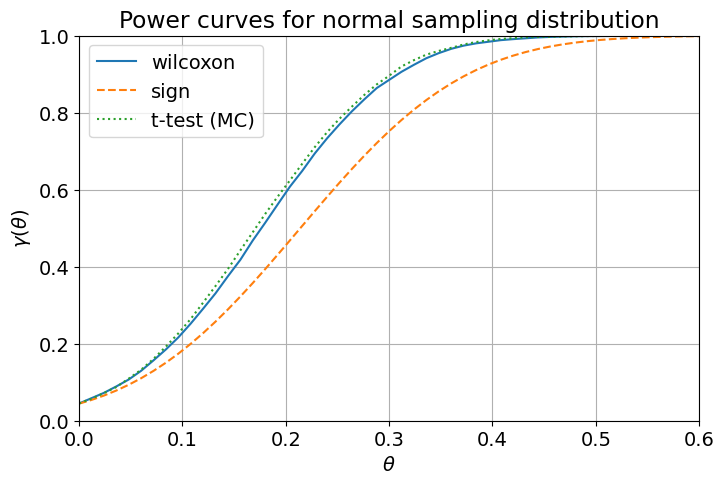

In [18]:
plt.plot(theta_t,gammasr_t,ls='-',label='wilcoxon');
plt.plot(theta_t,gammas_t,ls='--',label=r'sign');
plt.plot(theta_t,gammat_t,ls=':',label=r't-test (MC)');
plt.legend(loc='best');
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta)$');
plt.title('Power curves for normal sampling distribution');
plt.grid(True);
plt.xlim(0,0.6);
plt.ylim(0,1);

The t-test and wilcoxon perform similarly and better than the sign test.

**(c)** Laplace (double exponential) Sampling Distribution

Repeat the steps of part (b) to produce a comparison among the power curves for the three tests when the sampling distribution is a Laplace distribution with location parameter $\theta$ and scale parameter $1/\sqrt{2}$, as defined by SciPy's `stats` module (so the
    distribution is defined by
    `stats.laplace(loc=theta_t,scale=np.sqrt(0.5))`). Be sure to update
    any labels and titles appropriately.

In [19]:
# wilcoxon
N = 10**4
n = 100
np.random.seed(20250218)
d_Ii = stats.laplace.rvs(loc=0, scale=np.sqrt(0.5),  size=(N, n))

nthetas = 51
theta_t = np.linspace(0,0.6,nthetas)

stats.rankdata(np.abs(d_Ii))

R_Ii = stats.rankdata(np.abs(d_Ii),axis=-1)

Tp_tI = np.empty((nthetas,N))
for t in range(nthetas):
    dt_Ii = d_Ii + theta_t[t]
    Rt_Ii = stats.rankdata(np.abs(dt_Ii),axis=-1)
    Tp_tI[t] = (Rt_Ii*(dt_Ii>0)).sum(axis=-1)
    
gammasr_t = np.mean(Tp_tI>tpthresh,axis=-1)

In [20]:
# get signed
p = 0.5

mu = n * p
sigma = np.sqrt(n * p * (1-p))
ncrit = stats.norm(mu, sigma).isf(0.05)

ptheta_t = stats.laplace(loc=theta_t, scale=np.sqrt(0.5)).sf(0)

gammas_t = stats.binom(n,ptheta_t).sf(ncrit)

In [21]:
# t-test
tcrit = stats.t.isf(a, n-1)

np.random.seed(20250211)
N = 10**4
x_Ii = stats.laplace.rvs(loc=0, scale=np.sqrt(0.5), size=(N, n))
xbar_I = np.mean(x_Ii,axis=-1)
s_I = np.std(x_Ii,axis=-1,ddof=1)
t_tI = ( theta_t[:,None] + xbar_I[None,:] ) / (s_I[None,:]/np.sqrt(n))
gammat_t = np.mean((t_tI > tcrit),axis=-1)

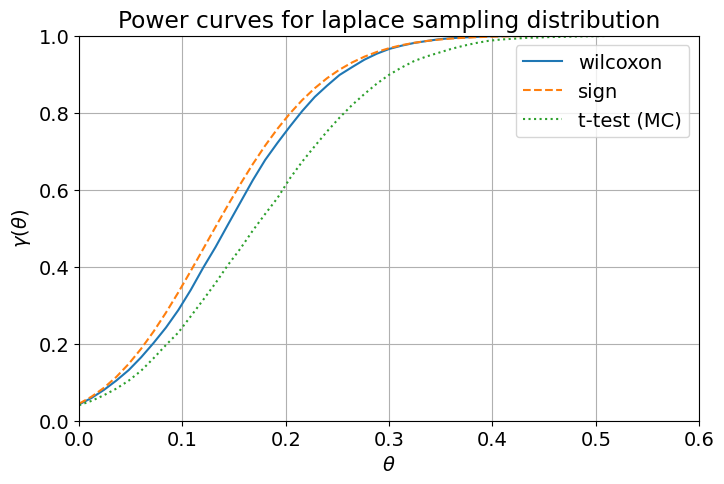

In [22]:
plt.plot(theta_t,gammasr_t,ls='-',label='wilcoxon');
plt.plot(theta_t,gammas_t,ls='--',label=r'sign');
plt.plot(theta_t,gammat_t,ls=':',label=r't-test (MC)');
plt.legend(loc='best');
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta)$');
plt.title('Power curves for laplace sampling distribution');
plt.grid(True);
plt.xlim(0,0.6);
plt.ylim(0,1);

Now the sign and wilcoxon are the best with the t-test MC being the worst.